## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

#classifier models:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#model evaluation metrics:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## 2. Read CSVs

In [2]:
full_df = pd.read_csv('../data/full_df.csv')

In [3]:
full_df.shape

(1875, 11)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1875 non-null   object 
 1   created_utc     1875 non-null   object 
 2   title           1875 non-null   object 
 3   self_text       1875 non-null   object 
 4   num_comments    1875 non-null   int64  
 5   num_upvotes     1875 non-null   int64  
 6   upvote_ratio    1875 non-null   float64
 7   subreddit       1875 non-null   object 
 8   title_length    1875 non-null   int64  
 9   day_of_week     1875 non-null   object 
 10  segment_of_day  1875 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 161.3+ KB


## 2. Feature Engineering

create a binary target y column by converting 'millenials' to 0 and 'genz' to 1 using .map() method

In [5]:
full_df['subreddit'] = full_df['subreddit'].map({'millenials': 0, 'GenZ': 1})

In [6]:
#inspect the 'subreddit' data column to verify that all binary conversion works
full_df

,id,created_utc,title,self_text,num_comments,num_upvotes,upvote_ratio,subreddit,title_length,day_of_week,segment_of_day
0,17s1aa5,2023-11-10 10:37:15,Do you feel dissillusioned with social media?,It's not difficult to argue that the user expe...,132,112,0.98,0,7,Friday,Morning
1,1ccrau6,2024-04-25 12:59:13,Yesterday I noticed a Lamborghini beside me in...,…was a time…,190,439,0.93,0,22,Thursday,Afternoon
2,1ccwkzr,2024-04-25 16:36:49,Going through a midlife crisis,I have been realizing recently that I am going...,47,25,0.90,0,5,Thursday,Afternoon
3,1cbwkmb,2024-04-24 12:12:05,It's funny how get a degree in anything has tu...,Had an interesting thought this morning. Obvio...,2026,4972,0.86,0,17,Wednesday,Afternoon
4,1ccjb7c,2024-04-25 04:44:28,Does anyone else's parents get angry when you ...,"For example, I have been separated from my son...",29,73,0.97,0,15,Thursday,Night
...,...,...,...,...,...,...,...,...,...,...,...
1870,1c2uxjx,2024-04-13 06:01:46,Upside down by Jack Johnson,Who else gets hit by nostalgia whenever they h...,2,1,0.67,1,5,Saturday,Morning
1871,1c2app9,2024-04-12 14:34:39,How to become a boomer,I want to feel like a boomer,22,16,0.75,1,5,Friday,Afternoon
1872,1c2q8ql,2024-04-13 01:36:20,Want to move out?,Hi. I made a discord server for resources on a...,1,3,0.71,1,4,Saturday,Night
1873,1bzn4ch,2024-04-09 08:35:05,How do us GenZ’s feel about this?,no_text,1741,33095,0.94,1,7,Tuesday,Morning


assign 'title' column to X
assign 'subreddit' column (currently it is in binary form 0 or 1) to y

In [7]:
X = full_df['title']
y = full_df['subreddit']

#### Train_Test_Split

Split the data into train and test sets and use random_state 101 to for reproducible results

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=101)

## 3. Binary Classification Models

### Base Model : accuracy score: 50%

since this is a binary classification model with target = 0 or 1, we can assume that the base model's accuracy score is the mean of the target in y_train.

In [9]:
y_train.mean()

0.48933143669985774

### 3A. LogisticRegression with CountVectorizer: test accuracy score 63%

In [10]:
# model pipeline
logreg_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

In [11]:
# parameter grid
param_grid_logreg = {
    'vect__max_features': [1000, 2000, 3000],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.01, 0.1, 1, 10]
}

In [12]:
# GridSearchCV to hyper-tune parameters
grid_logreg = GridSearchCV(logreg_pipe, param_grid_logreg, cv=5, scoring='accuracy', verbose=1)
grid_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'vect__max_features': [1000, 2000, 3000],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [13]:
# Display the best parameters
print("Best params for LogisticRegression with CountVectorizer:", grid_logreg.best_params_)

Best params for LogisticRegression with CountVectorizer: {'clf__C': 0.1, 'vect__max_features': 3000, 'vect__ngram_range': (1, 1)}


In [14]:
# model results
grid_logreg_count_preds = grid_logreg.predict(X_test)
print(classification_report(y_test, grid_logreg_count_preds))
# ConfusionMatrixDisplay(confusion_matrix(y_test, grid_logreg_count_preds)).plot()

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       240
           1       0.64      0.56      0.60       229

    accuracy                           0.63       469
   macro avg       0.63      0.63      0.63       469
weighted avg       0.63      0.63      0.63       469



### 3B. Multinomial Naive Bayes with CountVectorizer: test accuracy score 66%

In [15]:
# model pipeline
nb_count_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [16]:
# Parameter grid
param_grid_nb_count= {
    'vect__max_features': [500, 1000, 1500],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 1.0, 10.0]
}

In [17]:
# GridSearchCV to hyper-tune parameters
grid_nb_count = GridSearchCV(nb_count_pipe, param_grid_nb_count, cv=5, scoring='accuracy', verbose=1)
grid_nb_count.fit(X_train, y_train)
# Display the best parameters
print("Best params for Multinomial Naive Bayes with CountVectorizer:", grid_nb_count.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Multinomial Naive Bayes with CountVectorizer: {'clf__alpha': 1.0, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1)}


              precision    recall  f1-score   support

           0       0.66      0.69      0.67       240
           1       0.66      0.63      0.65       229

    accuracy                           0.66       469
   macro avg       0.66      0.66      0.66       469
weighted avg       0.66      0.66      0.66       469



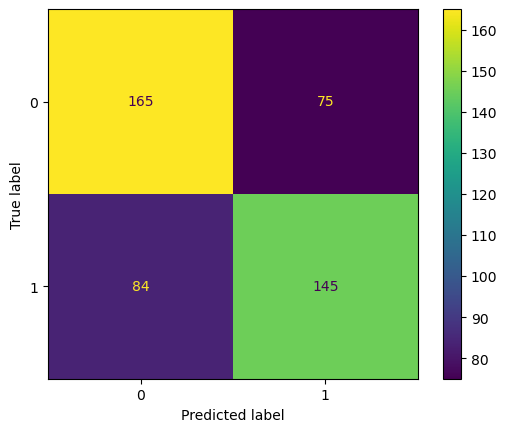

In [35]:
# model results
nb_count_preds = grid_nb_count.predict(X_test)
print(classification_report(y_test, nb_count_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, nb_count_preds)).plot()

In [38]:
# Identify misclassifications
misclassified_indices = (nb_count_preds != y_test)
misclassified_samples = full_df.iloc[X_test.index[misclassified_indices]]

In [39]:
misclassified_samples

,id,created_utc,title,self_text,num_comments,num_upvotes,upvote_ratio,subreddit,title_length,day_of_week,segment_of_day
1110,1cbn50i,2024-04-24 02:26:43,Hello.,Is there any justification to being a single m...,2,1,1.00,1,1,Wednesday,Night
1243,1c9y9na,2024-04-22 01:19:11,Who remembers this block?,no_text,3,4,1.00,1,4,Monday,Night
1063,1cc9ngs,2024-04-24 21:06:44,What makes Quarantine teens different from tee...,How did teen culture shift from before quarant...,10,1,1.00,1,10,Wednesday,Night
1312,1c9cqcz,2024-04-21 08:14:35,(tw shitpost),Hey boys let's raid r/genalpha with our best g...,4,1,0.56,1,2,Sunday,Morning
663,1al37kz,2024-02-07 13:43:16,Pretty good article from nytimes,Should be no paywall because I used one of my ...,1,3,1.00,0,5,Wednesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1150,1catmuw,2024-04-23 02:39:45,Who consider it good education? I vouch for y...,no_text,8,5,0.78,1,9,Tuesday,Night
776,194gj6k,2024-01-11 23:53:20,Revolutionize Legal and Political Empowerment,"I'm a 35-year-man from NJ, currently living in...",4,1,0.67,0,5,Thursday,Night
1825,1c2lrdw,2024-04-12 22:07:30,Post this for every humanitarian tragedy they ...,boingus,19,125,0.95,1,10,Friday,Night
46,1c9yhab,2024-04-22 01:30:08,Trump Trial Self-Immolator Donated Both His Ki...,no_text,3,26,0.85,0,11,Monday,Night


### 3C. Multinomial Naive Bayes with TfidfVectorizer: test accuracy score 66%

In [19]:
# model pipeline
nb_tfidf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [20]:
# Parameter grid
param_grid_nb_tfidf = {
    'tfidf__max_features': [500, 1000, 1500],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 1.0, 10.0]
}

In [21]:
# GridSearchCV to hyper-tune parameters
grid_nb_tfidf = GridSearchCV(nb_tfidf_pipe, param_grid_nb_tfidf, cv=5, scoring='accuracy', verbose=1)
grid_nb_tfidf.fit(X_train, y_train)

# Display the best parameters
print("Best params for Multinomial Naive Bayes TfidfVectorizer:", grid_nb_tfidf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Multinomial Naive Bayes TfidfVectorizer: {'clf__alpha': 10.0, 'tfidf__max_features': 1500, 'tfidf__ngram_range': (1, 2)}


In [22]:
#model results
nb_tfidf_count_preds = grid_nb_tfidf.predict(X_test)
print(classification_report(y_test, nb_tfidf_count_preds))
# ConfusionMatrixDisplay(confusion_matrix(y_test, nb_tfidf_count_preds)).plot()

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       240
           1       0.69      0.55      0.62       229

    accuracy                           0.66       469
   macro avg       0.67      0.66      0.66       469
weighted avg       0.67      0.66      0.66       469



### 3D. KNN with CountVectorizer:  test accuracy score 58%

In [23]:
# model pipeline
knn_count_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', KNeighborsClassifier())
])

In [24]:
# parameter grid
param_grid_knn = {
    'vect__max_features': [500, 1000],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__n_neighbors': [3, 5, 7]
}

In [25]:
# GridSearchCV to hyper-tune parameters
grid_knn = GridSearchCV(knn_count_pipe, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_knn.fit(X_train, y_train)

# Display the best parameters
print("Best Params (KNN):", grid_knn.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params (KNN): {'clf__n_neighbors': 5, 'vect__max_features': 500, 'vect__ngram_range': (1, 2)}


In [26]:
# model results
knn_preds = grid_knn.predict(X_test)
print(classification_report(y_test, knn_preds))
# ConfusionMatrixDisplay(confusion_matrix(y_test, knn_preds)).plot()

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       240
           1       0.59      0.46      0.52       229

    accuracy                           0.58       469
   macro avg       0.58      0.58      0.57       469
weighted avg       0.58      0.58      0.57       469



### 3E. RandomForest with CountVectorizer: test accuracy score 64%

In [27]:
# model pipeline
rf_count_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [28]:
# Parameter grid
param_grid_rf = {
    'vect__max_features': [500, 1000],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None]
}

In [29]:
# GridSearchCV to hyper-tune parameters
grid_rf = GridSearchCV(rf_count_pipe, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)

# Display the best parameters
print("Best Params (Random Forest):", grid_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params (Random Forest): {'clf__max_depth': 20, 'clf__n_estimators': 100, 'vect__max_features': 500, 'vect__ngram_range': (1, 1)}


In [30]:
# model results
rf_preds = grid_rf.predict(X_test)
print(classification_report(y_test, rf_preds))
# ConfusionMatrixDisplay(confusion_matrix(y_test, rf_preds)).plot()

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       240
           1       0.66      0.54      0.59       229

    accuracy                           0.64       469
   macro avg       0.64      0.64      0.64       469
weighted avg       0.64      0.64      0.64       469



### 3F. SVM with CountVectorizer: test accuracy score 64%

In [31]:
# model pipeline
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svm', SVC(kernel='linear')) 
])

In [32]:
# parameter grid
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

In [33]:
# GridSearchCV to hyper-tune parameters
grid_svm = GridSearchCV(svm_pipe, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_svm.fit(X_train, y_train)

# Display the best parameters
print("Best Params (SVM:", grid_rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params (SVM: {'clf__max_depth': 20, 'clf__n_estimators': 100, 'vect__max_features': 500, 'vect__ngram_range': (1, 1)}


In [34]:
# model results
svm_preds = grid_svm.predict(X_test)
print(classification_report(y_test, svm_preds))
# ConfusionMatrixDisplay(confusion_matrix(y_test, svm_preds)).plot()

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       240
           1       0.62      0.67      0.64       229

    accuracy                           0.64       469
   macro avg       0.64      0.64      0.64       469
weighted avg       0.64      0.64      0.64       469

